In [10]:
import pandas as pd
import numpy as np

import scipy.stats as st
import statsmodels.api as stm

from matplotlib import pyplot as plt

# Задание 4

Рассматривается поведение пуассоновской регрессии на overdispersed выборках.  
В пуассоновской регрессии используется предположение, что $\mu = \omega = e^{x^T\beta}$.
При этом $f(y|x) = \dfrac{e^{-\mu} \mu^y}{y!}$.

В качестве overdispersed выборки будет использована выборка, порожденная с помощью с помощью $NegotiveBinomial$ распределения.

$\Rightarrow y|X \sim NB(X\beta, \alpha)$.
При этом $\mu = e^{x^T\beta}$, $\omega = \mu + \alpha * \mu ^2$.

Таким образом, чем больше $\alpha$, тем сильнее дисперсия отличается от матожидания.

Выразим $\mu, \alpha$ через $r, p$ для $NegotiveBinomial$:  
$p = \dfrac{\mu}{r + \mu}, \ \ r = \dfrac{1}{\alpha}$  


Будем генерировать выборку:
Выбираем $X$ и $\beta$. По ним определяем $\mu = X\beta$. 

Для каждого рассматриваемого $\alpha$: $y = NB(mu, \alpha) = negative\_binomial(r, p)$

In [11]:
sample_size = 10000
k = 2
beta = np.random.randn(k)

def nb(mu, alpha):
    p = mu / ((1. / alpha) + mu)
    r = 1. / alpha

    return np.random.negative_binomial(r, p)

In [12]:
X = np.random.normal(4.0, 1, (sample_size, k))
mu = np.exp(X.dot(beta))
y = nb(mu, 0.5)

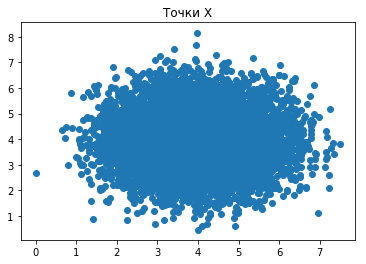

In [13]:
_ = plt.scatter(X.T[0], X.T[1])
_ = plt.title("Точки X")

In [14]:
model = stm.GLM(y, stm.add_constant(X), family=stm.families.NegativeBinomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24243.
Date:                Sat, 27 Apr 2019   Deviance:                       7088.7
Time:                        20:25:29   Pearson chi2:                 6.46e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3702      0.069     19.765      0.000       1.234       1.506
x1            -1.0969      0.013    -84.433      0.000      -1.122      -1.071
x2             1.0427      0.013     80.644      0.000       1.017       1.068
==============================================================================
"""

In [15]:
model = stm.GLM(y, stm.add_constant(X), family=stm.families.Poisson()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40419.
Date:                Sat, 27 Apr 2019   Deviance:                       54521.
Time:                        20:25:30   Pearson chi2:                 5.82e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4311      0.019     75.375      0.000       1.394       1.468
x1            -1.1092      0.003   -331.077      0.000      -1.116      -1.103
x2             1.0390      0.003    319.690      0.000       1.033       1.045
==============================================================================
"""

In [16]:
results = []
results_1 = []

for alpha in np.linspace(0.02, 1, 40):
    y = nb(mu, alpha)
    
    model = stm.GLM(y, stm.add_constant(X), family=stm.families.Poisson()).fit()
    results.append((alpha, model.aic, model.bic, model.llf, model.deviance))
    
    model = stm.GLM(y, stm.add_constant(X), family=stm.families.NegativeBinomial()).fit()
    results_1.append((alpha, model.aic, model.bic, model.llf, model.deviance))

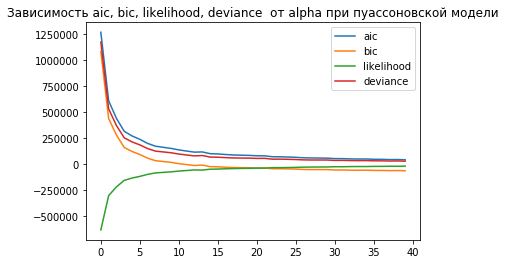

In [17]:
res_df = pd.DataFrame(results, columns=["alpha", "aic", "bic", "likelihood", "deviance"])
_ = res_df.iloc[:, 1:].plot()
_ = plt.title("Зависимость aic, bic, likelihood, deviance  от alpha при пуассоновской модели")

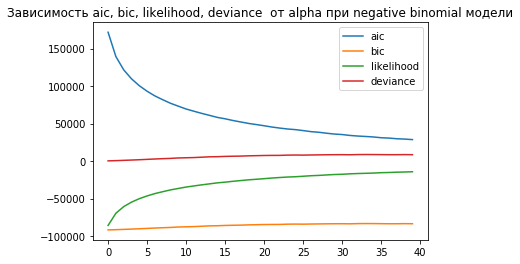

In [18]:
res_df = pd.DataFrame(results_1, columns=["alpha", "aic", "bic", "likelihood", "deviance"])
_ = res_df.iloc[:, 1:].plot()
_ = plt.title("Зависимость aic, bic, likelihood, deviance  от alpha при negative binomial модели")

В случае overdispersed выборки приводит  пуассоновская регрессия к большим ошибкам по $aic, bic$ и большим значениям $deviance$ по сравнению с использованием $negative binomial$ модели.  

Отмечу, что при отсутствие overdispersion $negative\_binomial$ модель все еще работает хорошо:

## Не overdispersed выборка

In [19]:
results = []
results_1 = []

for alpha in np.linspace(0.02, 1, 40):
    y = np.random.poisson(mu)
    
    model = stm.GLM(y, stm.add_constant(X), family=stm.families.Poisson()).fit()
    results.append((alpha, model.aic, model.bic, model.llf, model.deviance))
    
    model = stm.GLM(y, stm.add_constant(X), family=stm.families.NegativeBinomial()).fit()
    results_1.append((alpha, model.aic, model.bic, model.llf, model.deviance))

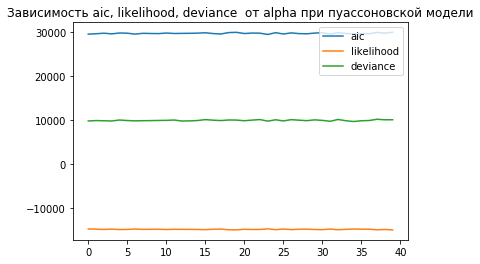

In [20]:
res_df = pd.DataFrame(results, columns=["alpha", "aic", "bic", "likelihood", "deviance"])
_ = res_df.iloc[:, [1, 3, 4]].plot()
_ = plt.title("Зависимость aic, likelihood, deviance  от alpha при пуассоновской модели")

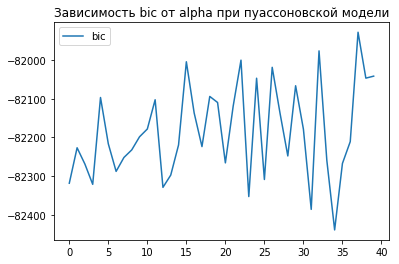

In [21]:
res_df = pd.DataFrame(results, columns=["alpha", "aic", "bic", "likelihood", "deviance"])
_ = res_df.iloc[:, [2]].plot()
_ = plt.title("Зависимость bic от alpha при пуассоновской модели")

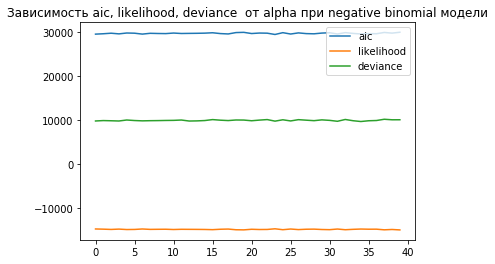

In [22]:
res_df = pd.DataFrame(results, columns=["alpha", "aic", "bic", "likelihood", "deviance"])
_ = res_df.iloc[:, [1, 3, 4]].plot()
_ = plt.title("Зависимость aic, likelihood, deviance  от alpha при negative binomial модели")

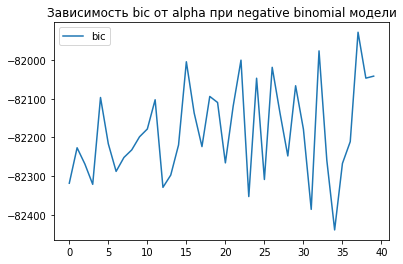

In [23]:
res_df = pd.DataFrame(results, columns=["alpha", "aic", "bic", "likelihood", "deviance"])
_ = res_df.iloc[:, [2]].plot()
_ = plt.title("Зависимость bic от alpha при negative binomial модели")